In [1]:
import numpy as np
from scipy import stats
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import pymc3 as pm
import theano.tensor as tt

print(f"PyMC3 Version {pm.__version__}")

%matplotlib inline

PyMC3 Version 3.5


BDA3 Exercise 2.13

In [2]:
airline_data = pd.read_csv("airline_fatalities.csv")

Table 2.2

In [3]:
airline_data

,year,fatal_accidents,passenger_deaths,death_rate
0,1976,24,734,0.19
1,1977,25,516,0.12
2,1978,31,754,0.15
3,1979,31,877,0.16
4,1980,22,814,0.14
5,1981,21,362,0.06
6,1982,26,764,0.13
7,1983,20,809,0.13
8,1984,16,223,0.03
9,1985,22,1066,0.15


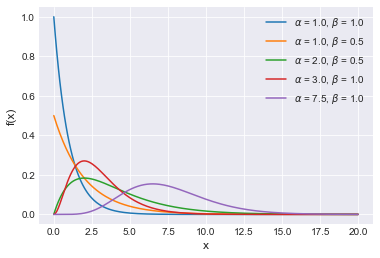

In [12]:
plt.style.use('seaborn-darkgrid')
x = np.linspace(0, 20, 200)
alphas = [1., 1., 2., 3., 7.5]
betas = [1., .5, .5, 1., 1.]
for a, b in zip(alphas, betas):
    pdf = stats.gamma.pdf(x, a, scale=1.0/b)
    plt.plot(x, pdf, label=r'$\alpha$ = {}, $\beta$ = {}'.format(a, b))
plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.legend(loc=1)
plt.show()


13.a

In [104]:
with pm.Model() as model_a:
    
#     theta = pm.Gamma("theta", 1, 1)
    theta = pm.Uniform("theta", 0, 1000)
    
    y = pm.Poisson("fatal_accidents", theta, observed=airline_data["fatal_accidents"].values)

In [105]:
model_a

In [106]:
with model_a:
    trace_a = pm.sample(draws=2000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta]
Sampling 4 chains: 100%|██████████| 12000/12000 [00:01<00:00, 7194.02draws/s]


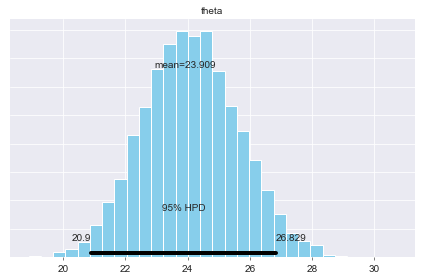

In [107]:
with model_a:
    pm.plot_posterior(trace_a)

13.b

In [243]:
m = 8
M = 10**m #10**3
M

100000000

In [244]:
airline_data["miles_flown"] = np.round(airline_data["passenger_deaths"]/airline_data["death_rate"]*M, 0)

In [245]:
airline_data

,year,fatal_accidents,passenger_deaths,death_rate,miles_flown
0,1976,24,734,0.19,3.863158e+11
1,1977,25,516,0.12,4.300000e+11
2,1978,31,754,0.15,5.026667e+11
3,1979,31,877,0.16,5.481250e+11
4,1980,22,814,0.14,5.814286e+11
5,1981,21,362,0.06,6.033333e+11
6,1982,26,764,0.13,5.876923e+11
7,1983,20,809,0.13,6.223077e+11
8,1984,16,223,0.03,7.433333e+11
9,1985,22,1066,0.15,7.106667e+11


In [246]:
n_1986 = 8000*M
n_1986

800000000000

In [247]:
with pm.Model() as model_b:
    
    fatality_rate = pm.Gamma("fatality_rate", 1, 1)
    mu = airline_data["miles_flown"].values/M * fatality_rate
    
    y = pm.Poisson("fatal_accidents", mu, observed=airline_data["fatal_accidents"].values)
    
    y_pred = pm.Deterministic("fatal_accidents_pred", n_1986/M * fatality_rate)

In [248]:
model_b

In [249]:
with model_b:
    trace_b = pm.sample(draws=2000, tune=2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [fatality_rate]
Sampling 4 chains: 100%|██████████| 16000/16000 [00:02<00:00, 6891.02draws/s]


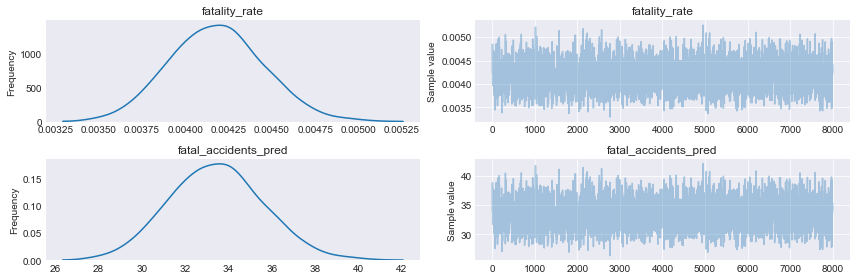

In [250]:
with model_b:
    pm.traceplot(trace_b, combined=True)

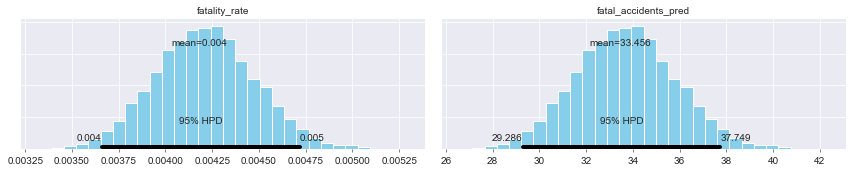

In [251]:
with model_b:
    pm.plot_posterior(trace_b)

13.c

In [82]:
with pm.Model() as model_c:
    
    theta = pm.Gamma("theta", 1, 1)
    
    y = pm.Poisson("passenger_deaths", theta, observed=airline_data["passenger_deaths"].values)

In [83]:
with model_c:
    trace_c = pm.sample(draws=2000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta]
Sampling 4 chains: 100%|██████████| 12000/12000 [00:01<00:00, 6360.51draws/s]


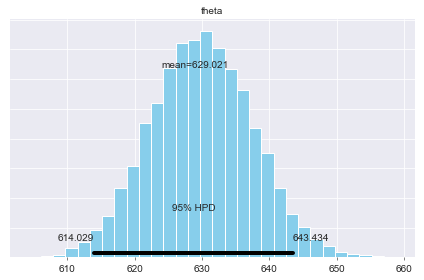

In [84]:
with model_c:
    pm.plot_posterior(trace_c)

13.d

In [79]:
with pm.Model() as model_d:
    
    lam = pm.Gamma("lambda", 1, 1)
    mu = airline_data["miles_flown"].values * lam
    
    y = pm.Poisson("passenger_deaths", mu, observed=airline_data["passenger_deaths"].values)
    
    y_pred = pm.Deterministic("passenger_deaths_pred", 8000 * lam)

In [80]:
with model_d:
    trace_d = pm.sample(draws=2000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [lambda]
Sampling 4 chains: 100%|██████████| 12000/12000 [00:01<00:00, 6863.28draws/s]


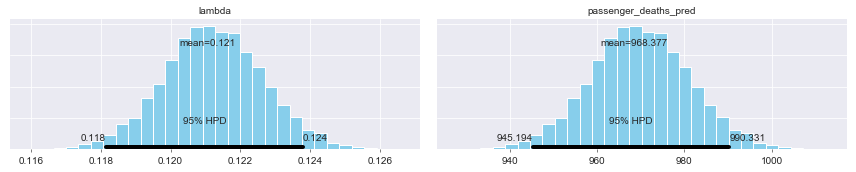

In [81]:
with model_d:
    pm.plot_posterior(trace_d)